In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np 
import os
import datetime

import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_style('whitegrid')

import matplotlib

%matplotlib inline

### Loading data for Analysis

In [3]:
root_dir  = os.path.abspath('.')
data_dir  = os.path.join(root_dir, 'data')
train     = os.path.join(data_dir,'Train.csv')
test      = os.path.join(data_dir,'Test.csv' )
submt_fil = os.path.join(data_dir,'Final_submission.csv' )

In [4]:
train_df = pd.read_csv(train)
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [6]:
train_df.shape

(284780, 8)

In [7]:
train_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
test_df = pd.read_csv(test)
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [9]:
test_df.shape

(122049, 7)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [11]:
test_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [12]:
#Converting InvoiceDate column to datetime.

train_df['InvoiceDate'] = pd.to_datetime(train_df['InvoiceDate'], errors='coerce')
test_df['InvoiceDate'] = pd.to_datetime(test_df['InvoiceDate'], errors='coerce')

print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    122049 non-null  int64         
 1   StockCode    122049 non-null  int64         
 2   

### EDA and Feature Engineering on Training Dataset

In [13]:
monthMap = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}

# Extracting Month and Year from Date columns
train_df['Year'] = pd.DatetimeIndex(train_df['InvoiceDate']).year
train_df['Month'] = pd.DatetimeIndex(train_df['InvoiceDate']).month
#df.Month.apply(lambda x: datetime.strptime(str(x), '%m').strftime('%b'))
#train_df['MonthName'] = train_df.Month.apply(lambda x: datetime.datetime.strptime(str(x), '%m').strftime('%b'))
train_df['YearMonth'] = train_df["Year"].astype(str) + train_df["Month"].map(monthMap)
train_df['YearMonth'] = train_df['YearMonth'].apply(lambda x: int(x))

In [14]:
def ShowValueCounts(df, feature, normalize=False, Sorted=False):
    x = df[feature].value_counts(normalize=normalize).rename_axis(feature).reset_index(name='counts')
    plt.figure(figsize=(15,10))
    if Sorted:
        sns.barplot(x = feature, y = 'counts', data = x.loc[:25] , order=x.loc[:25].sort_values('counts', ascending=False)[feature])
    else:
        sns.barplot(x = feature, y = 'counts', data = x.loc[:25])
    plt.show()

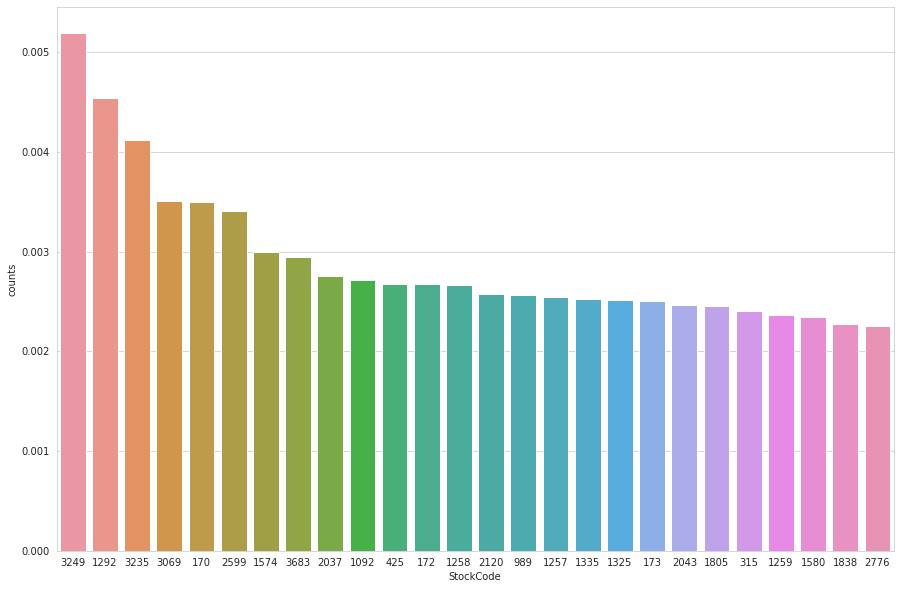

In [15]:
#Visualizing based on StockCode
ShowValueCounts(train_df, 'StockCode',normalize=True,Sorted=True)

##### Above we have plotted top 25 Stockcode sold 

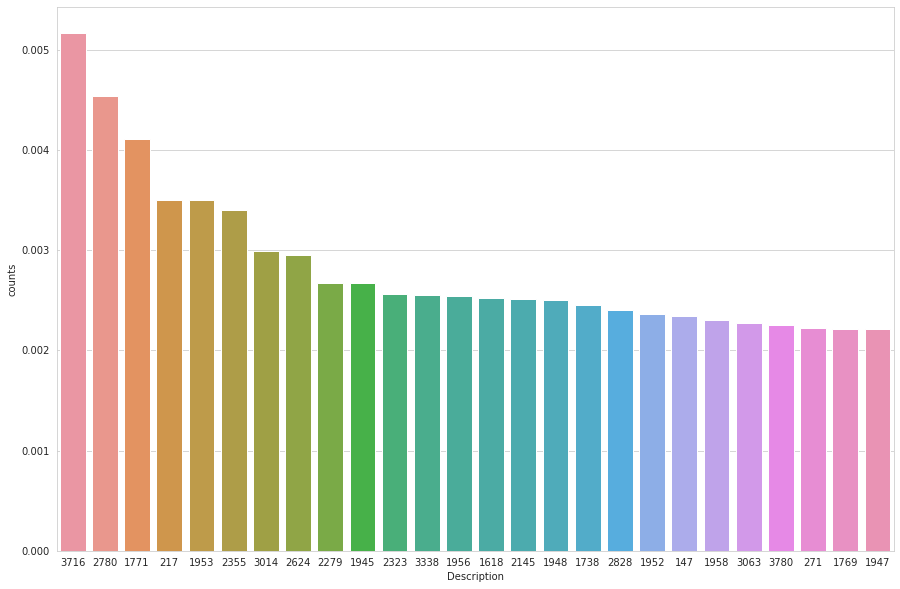

In [16]:
#Visualizing counts based on Description
ShowValueCounts(train_df, 'Description',normalize=True, Sorted=True)

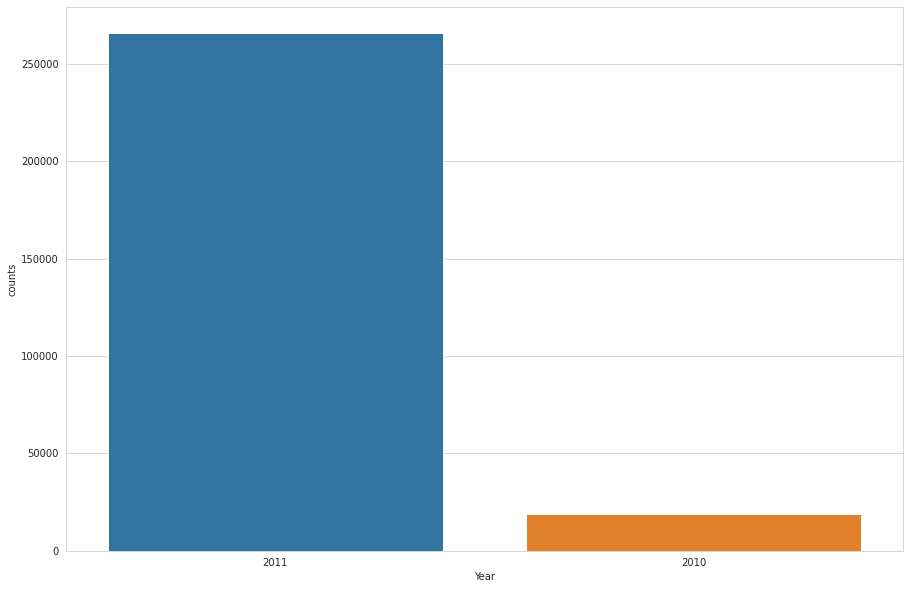

In [17]:
#Visualizing Counts based on Year
ShowValueCounts(train_df, 'Year', Sorted=True)

There is only few months of 2010 available, hence the value counts are low 

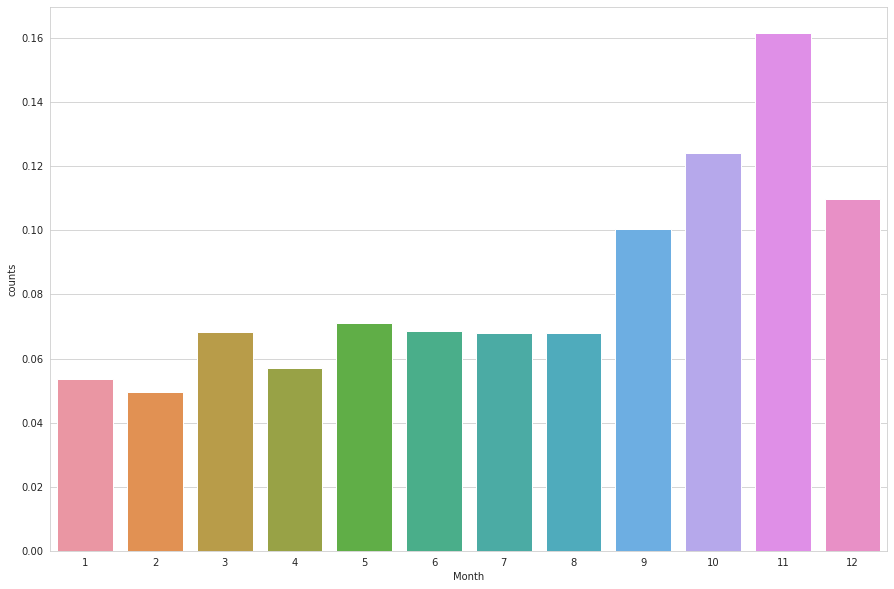

In [18]:
#Visualizing Counts based on Month
ShowValueCounts(train_df, 'Month',normalize=True, Sorted=False)

#### 11, 10, 12, 9 months where higher items sold while 2 is when the least products are sold. Months 6, 3, 7, 8 Almost same quantity of amount being sold. 

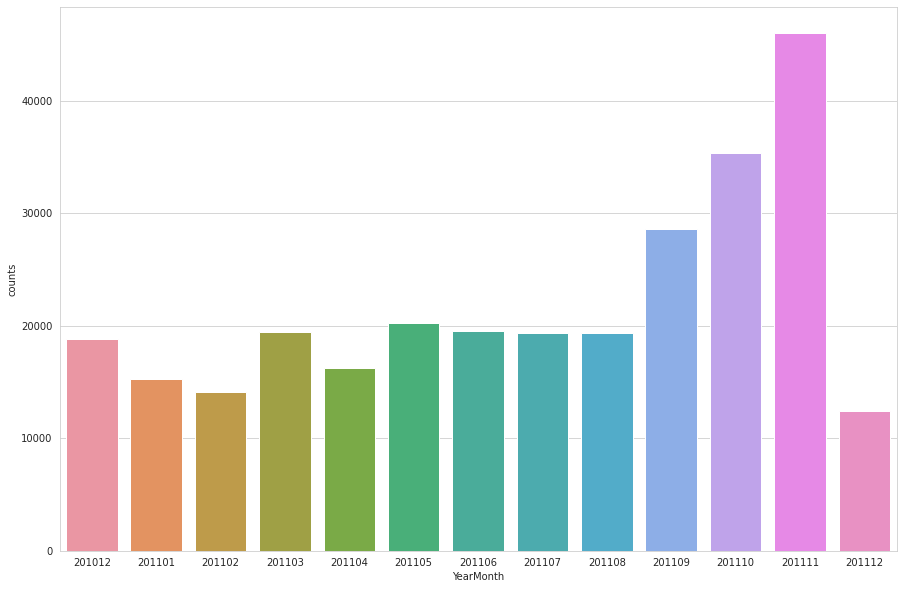

In [19]:
#Visualizing Counts based on year/Month
ShowValueCounts(train_df, 'YearMonth')

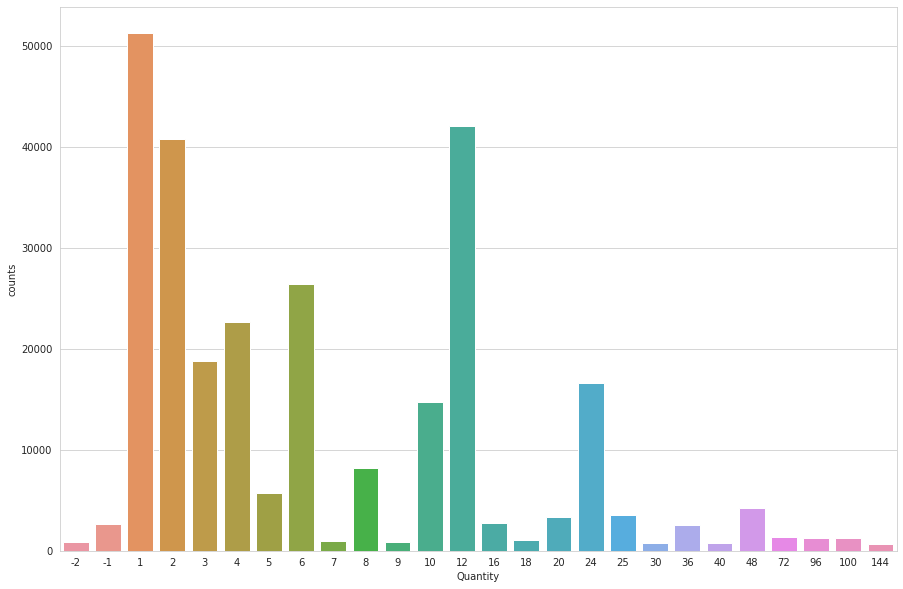

In [20]:
#Visualizing Counts based on Quantity Sold
ShowValueCounts(train_df, 'Quantity')

From the above, we can see there are negative Quantity Sold. This needs to be analyzed further. 

There are also Higher number of quantity sold, We will look into these cases in detail. 

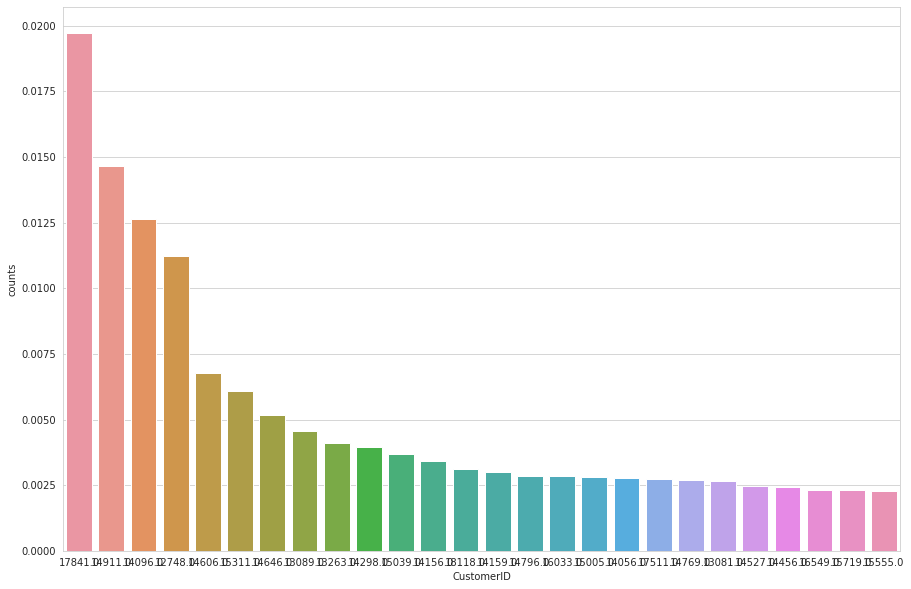

In [21]:
#Visualizing Counts based on Customer
ShowValueCounts(train_df, 'CustomerID',normalize=True,Sorted=True)

There are few customers who are frequent buyers, while some are not.

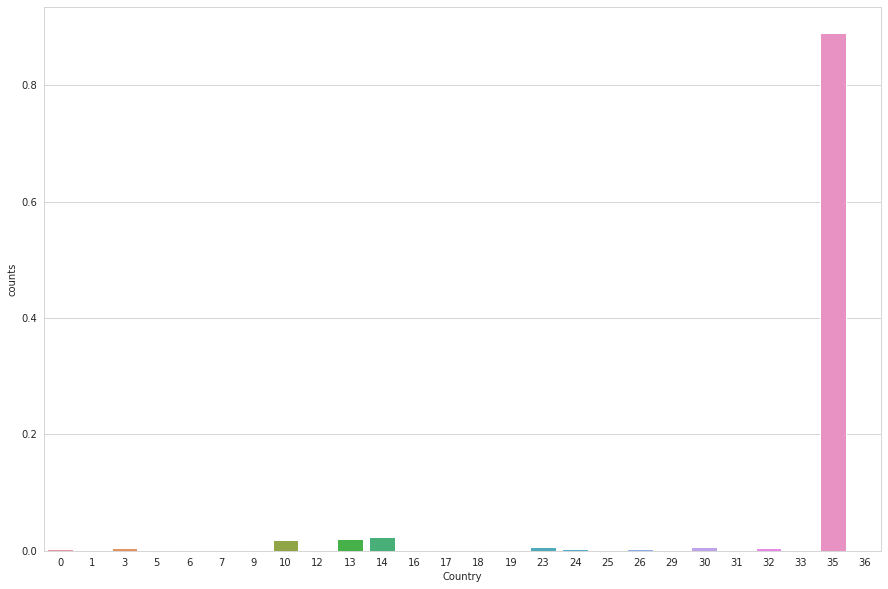

In [22]:
#Visualizing Counts based on Country
ShowValueCounts(train_df, 'Country',normalize=True)

Country ID 35 is the highest sold, while there are few countries which are sold very less. 

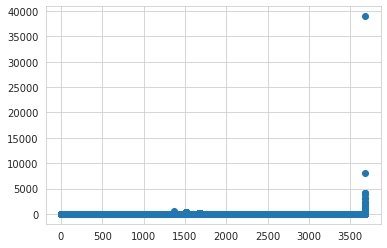

In [23]:
#verifying the price fluctuations for stockcode
plt.scatter(train_df.StockCode, train_df.UnitPrice)
plt.show()

From the above plot we can see there are outliers with unitprice going upto 40000. Let us check what this outlier is and how it can be treated.



In [24]:
x = train_df.loc[train_df.UnitPrice >= 1000]
x.StockCode.unique()

array([3680, 3681, 3679, 3678, 3683])

In [25]:
#Checking for these values in test dataset 
y = test_df.loc[test_df.StockCode.isin(x.StockCode.unique())]
y.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
362,3711,3681,2140,1,2011-03-09 09:50:00,12924.0,35
640,2524,3683,2624,3,2011-02-03 13:30:00,12464.0,3
679,7846,3683,2624,1,2011-06-09 13:09:00,12399.0,3
1345,12623,3683,2624,1,2011-09-22 16:58:00,12437.0,13
1601,16500,3683,2624,1,2011-11-17 09:34:00,12610.0,18


In [26]:
x = train_df.loc[train_df.StockCode.isin(x.StockCode.unique())]
x.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth
258,2087,3683,2624,2,2011-01-24 12:58:00,18.0,12693.0,14,2011,1,201101
474,9788,3683,2624,1,2011-07-24 13:18:00,2.9,17935.0,35,2011,7,201107
543,1658,3683,2624,5,2011-01-11 07:57:00,18.0,12736.0,13,2011,1,201101
910,15581,3683,2624,5,2011-11-07 12:27:00,15.0,12408.0,3,2011,11,201111
1380,6811,3683,2624,4,2011-05-19 08:26:00,18.0,12481.0,14,2011,5,201105


#### It looks like these 4 products are ranging Between 2.9 to over 1000. We will update the UnitPrice value to median of the value. grouped by CountryID. 

In [27]:
xGroupBy = x.groupby(["StockCode","Country"]).agg({'UnitPrice':np.median}).reset_index()
xGroupBy.head()

,StockCode,Country,UnitPrice
0,3678,35,464.715
1,3679,10,434.510
2,3679,35,27.215
3,3680,35,715.850
4,3681,6,293.000


In [28]:
#updating Train_df outliers with median data 
#train_df = train_df.join(xGroupBy, on=["StockCode","Country"], how='left',rsuffix='_temp')
train_df = pd.merge(train_df, xGroupBy, on=["StockCode","Country"], how='left')


In [29]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,201105,NaN
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,201105,NaN
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,201111,NaN
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,201111,NaN
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,201105,NaN


In [30]:
def myfunc(x,y):
    if x >= 1000:
        return y
    else:
        return x

In [31]:
train_df['UnitPrice'] = train_df.apply(lambda x: myfunc(x.UnitPrice_x, x.UnitPrice_y), axis=1)


In [32]:
train_df.loc[train_df.UnitPrice_x>=1000].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y,UnitPrice
8863,16242,3680,1043,1,2011-11-14 15:27:00,1500.36,14096.0,35,2011,11,201111,715.850,715.850
11961,14292,3681,2140,1,2011-10-19 11:18:00,2118.74,12744.0,29,2011,10,201110,1685.845,1685.845
51127,14824,3681,2140,1,2011-10-27 14:13:00,4161.06,12536.0,13,2011,10,201110,575.650,575.650
52322,17128,3680,1043,1,2011-11-23 13:39:00,1270.06,14096.0,35,2011,11,201111,715.850,715.850
58879,4823,3681,2140,1,2011-04-04 13:03:00,2382.92,12744.0,29,2011,4,201104,1685.845,1685.845
60351,3816,3681,2140,1,2011-03-11 10:22:00,1687.17,14911.0,10,2011,3,201103,1687.170,1687.170
65239,19659,3679,1066,-1,2011-04-08 14:17:00,1867.86,17940.0,35,2011,4,201104,27.215,27.215
71290,3815,3681,2140,1,2011-03-11 10:19:00,1687.17,14911.0,10,2011,3,201103,1687.170,1687.170
103356,19618,3681,2140,-1,2011-04-04 13:08:00,2382.92,12744.0,29,2011,4,201104,1685.845,1685.845
110272,19618,3681,2140,-1,2011-04-04 13:08:00,1252.95,12744.0,29,2011,4,201104,1685.845,1685.845


In [33]:
train_df[train_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y,UnitPrice
20,20652,3131,1576,-36,2011-07-26 10:15:00,1.06,12431.0,0,2011,7,201107,NaN,1.06
152,22083,2224,11,-1,2011-12-01 10:41:00,4.95,15993.0,35,2011,12,201112,NaN,4.95
157,19796,1521,2679,-6,2011-04-26 11:19:00,2.95,12705.0,14,2011,4,201104,NaN,2.95
186,21750,2166,1760,-100,2011-11-09 11:41:00,1.79,17511.0,35,2011,11,201111,NaN,1.79
196,21369,1014,2934,-17,2011-10-06 20:08:00,4.25,16839.0,35,2011,10,201110,NaN,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284550,21879,2145,3746,-1,2011-11-18 09:44:00,2.10,17034.0,35,2011,11,201111,NaN,2.10
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,2011,10,201110,NaN,1.25
284727,22148,2334,3664,-6,2011-12-06 14:57:00,3.75,15622.0,35,2011,12,201112,NaN,3.75
284740,20867,2658,826,-1,2011-08-22 15:00:00,3.25,16184.0,35,2011,8,201108,NaN,3.25


In [34]:
test_df[test_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
36,20489,1102,3768,-12,2011-07-07 17:22:00,18072.0,35
104,19675,3207,1325,-1,2011-04-11 13:43:00,13668.0,35
125,20177,515,1940,-2,2011-06-05 12:01:00,15722.0,35
175,19710,1739,3109,-1,2011-04-14 10:49:00,12982.0,35
238,21020,1650,197,-1,2011-09-09 12:52:00,16173.0,35
...,...,...,...,...,...,...,...
121786,20390,1621,1177,-2,2011-06-26 15:47:00,17731.0,35
121790,21022,2079,3025,-1,2011-09-09 12:55:00,14210.0,35
121795,20197,1923,2669,-5,2011-06-07 14:29:00,15189.0,35
121912,19643,1805,1738,-1,2011-04-06 17:16:00,17438.0,35


### we are observing rows with negative qty. Initial plan was to drop this from the train dataset. However, we are seeing same pattern of negative quantity in the test dataset as well. Hence, until we know a correct business decision around this, it is better we leave it in the dataset so that model will take into account the negative value. 

In [35]:
# since StockCode and Description are the same thing, we can remove Description from the DataSet
#We dont need Invoice number, customer Number and invoice date. So we can remove all these columns from train dataset
train_df = train_df.drop(columns=["Description", "UnitPrice_x","UnitPrice_y","CustomerID", "InvoiceNo", "InvoiceDate",'Year','Month'], axis = 1)

#test_df = test_df.drop(columns=["Description"], axis = 1)

In [36]:
train_df.head()

,StockCode,Quantity,Country,YearMonth,UnitPrice
0,1583,3,35,201105,3.75
1,1300,6,35,201105,1.95
2,2178,4,35,201111,5.95
3,2115,1,35,201111,0.83
4,1210,12,35,201105,1.65


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StockCode  284780 non-null  int64  
 1   Quantity   284780 non-null  int64  
 2   Country    284780 non-null  int64  
 3   YearMonth  284780 non-null  int64  
 4   UnitPrice  284780 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 13.0 MB


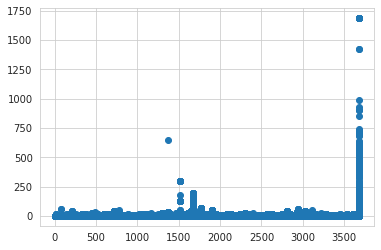

In [38]:
plt.scatter(train_df.StockCode, train_df.UnitPrice)
plt.show()

In [39]:
train_df.loc[(train_df['StockCode']> 2000) & (train_df['UnitPrice']>=1500)]

,StockCode,Quantity,Country,YearMonth,UnitPrice
11961,3681,1,29,201110,1685.845
58879,3681,1,29,201104,1685.845
60351,3681,1,10,201103,1687.170
71290,3681,1,10,201103,1687.170
103356,3681,-1,29,201104,1685.845
110272,3681,-1,29,201104,1685.845
111657,3681,1,29,201104,1685.845
155565,3681,-1,29,201110,1685.845
207110,3681,-1,29,201110,1685.845


In [40]:
monthMap = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}

# Extracting Month and Year from Date columns
test_df['Year'] = pd.DatetimeIndex(test_df['InvoiceDate']).year
test_df['Month'] = pd.DatetimeIndex(test_df['InvoiceDate']).month
test_df['YearMonth'] = test_df["Year"].astype(str) + test_df["Month"].map(monthMap)
test_df['YearMonth'] = test_df['YearMonth'].apply(lambda x: int(x))

In [41]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Year,Month,YearMonth
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2011,2,201102
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,2010,12,201012
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,2011,10,201110
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,2011,6,201106
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,2011,11,201111


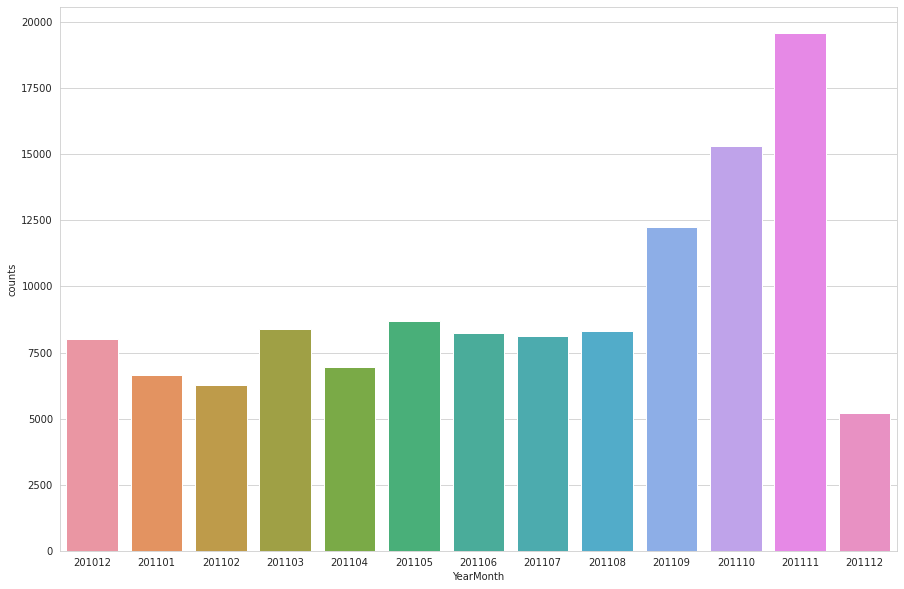

In [42]:
#Visualizing Counts based on year/Month
ShowValueCounts(test_df, 'YearMonth')

In [43]:
#removing unused columns from test df
test_df = test_df.drop(columns=["Description", "CustomerID", "InvoiceNo", "InvoiceDate",'Year','Month'], axis = 1)


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StockCode  284780 non-null  int64  
 1   Quantity   284780 non-null  int64  
 2   Country    284780 non-null  int64  
 3   YearMonth  284780 non-null  int64  
 4   UnitPrice  284780 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 13.0 MB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   StockCode  122049 non-null  int64
 1   Quantity   122049 non-null  int64
 2   Country    122049 non-null  int64
 3   YearMonth  122049 non-null  int64
dtypes: int64(4)
memory usage: 3.7 MB




## Model Building - Starting with Simple Model (linear Regression)

#### Scaling all the Category variables
##### LabelEncoder for YearMonth
##### MinMaxScaler for StockCode and Country
##### PowerTransformer for Quantity as it has negative values as well

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error

In [47]:
X = train_df.drop(columns=['UnitPrice'], axis=1)
y = train_df['UnitPrice']

labEncoder = LabelEncoder()
X['YearMonth'] = labEncoder.fit_transform(X['YearMonth'])
test_df['YearMonth'] = labEncoder.transform(test_df['YearMonth'])

powerTransformer = PowerTransformer()
qty = X['Quantity'].values.reshape(-1,1)
qty1 = test_df["Quantity"].values.reshape(-1,1)
qty = powerTransformer.fit_transform(qty)
qty1 = powerTransformer.transform(qty1)
#Appending the transformed columns back to the data frame
X['Quantity'] = pd.DataFrame(data=qty)
test_df['Quantity'] = pd.DataFrame(data=qty1)

minMax = MinMaxScaler()
stockcode = X['StockCode'].values.reshape(-1,1)
stockcode1 = test_df['StockCode'].values.reshape(-1,1)
stockcode = minMax.fit_transform(stockcode)
stockcode1 = minMax.transform(stockcode1)
#Appending the transformed columns back to the data frame
X['StockCode'] = pd.DataFrame(data=stockcode)
test_df['StockCode'] = pd.DataFrame(data=stockcode1)

countryMinMax = MinMaxScaler()
cntry = X['Country'].values.reshape(-1,1)
cntry1 = test_df['Country'].values.reshape(-1,1)
cntry = minMax.fit_transform(cntry)
cntry1 = minMax.transform(cntry1)
#Appending the transformed columns back to the data frame
X['Country'] = pd.DataFrame(data=cntry)
test_df['Country'] = pd.DataFrame(data=cntry1)

output_power_trans = PowerTransformer()
y = y.values.reshape(-1,1)
y = output_power_trans.fit_transform(y)

In [48]:
X.head()

,StockCode,Quantity,Country,YearMonth
0,0.429813,-0.031586,0.972222,5
1,0.352973,-0.021362,0.972222,5
2,0.591366,-0.028183,0.972222,11
3,0.574260,-0.038367,0.972222,11
4,0.328537,-0.000816,0.972222,5


In [49]:
test_df.head()

,StockCode,Quantity,Country,YearMonth
0,0.464024,-0.031586,0.972222,2
1,0.138474,-0.038367,0.972222,0
2,0.163997,0.081974,0.972222,10
3,0.401303,-0.034981,0.972222,6
4,0.873201,-0.038367,0.972222,11


In [50]:
y

array([[ 0.78796353],
       [ 0.01350189],
       [ 1.28355766],
       ...,
       [ 1.62371496],
       [ 0.69280208],
       [-1.08556991]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

#### Use pipeline to evaluate different algorithms. Here we are evaluating LinearRegression, Lasso, Ridge, KNeighboursRegressor and RandomForestRegressor

In [52]:

from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('model_linReg', Pipeline([('LR',LinearRegression())])))
#pipelines.append(('model_Lasso', Pipeline([('LASSO', Lasso())])))
#pipelines.append(('model_Ridge', Pipeline([('RIDGE', Ridge())])))
#pipelines.append(('model_KNRegressor', Pipeline([('KNN', KNeighborsRegressor())])))
#pipelines.append(('model_RFRegressor', Pipeline([('RF', RandomForestRegressor())])))
#pipelines.append(('model_GrdBoostReg', Pipeline([('GradBoostReg', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

model_linReg: -0.984660 (0.007093)


#### Using GradientBoostingRegr

In [53]:
gboostreg = GradientBoostingRegressor()
gboostreg.fit(X_train, y_train)
y_pred_train = gboostreg.predict(X_train)
results = mean_squared_error(y_train, y_pred_train)
print('train:', results)

y_pred = gboostreg.predict(X_test)
results = mean_squared_error(y_test, y_pred)
print('test:', results)

train: 0.5662622251214716
test: 0.5697452247866389


In [54]:
finalPrediction = gboostreg.predict(test_df)

finalPrediction = output_power_trans.inverse_transform(finalPrediction.reshape(-1,1))
test_unitPrice = pd.DataFrame(data=finalPrediction,columns=["UnitPrice"])
test_unitPrice['UnitPrice'] = test_unitPrice['UnitPrice'].apply(lambda x: round(x,2))
test_unitPrice.head()

,UnitPrice
0,2.67
1,2.75
2,1.06
3,3.13
4,2.56


In [55]:
test_unitPrice.to_csv(os.path.join(data_dir,'Final_submission_GradientBoostRegressor.csv' ), index=False)

### Remodelling by removing Quantity. Quantity Seems more to the Amount of Stocks purchased by the Customer

In [58]:
print(X.head())
print(test_df.head())

   StockCode  Quantity   Country  YearMonth
0   0.429813 -0.031586  0.972222          5
1   0.352973 -0.021362  0.972222          5
2   0.591366 -0.028183  0.972222         11
3   0.574260 -0.038367  0.972222         11
4   0.328537 -0.000816  0.972222          5
   StockCode  Quantity   Country  YearMonth
0   0.464024 -0.031586  0.972222          2
1   0.138474 -0.038367  0.972222          0
2   0.163997  0.081974  0.972222         10
3   0.401303 -0.034981  0.972222          6
4   0.873201 -0.038367  0.972222         11


In [59]:
X = X.drop(columns=['Quantity'], axis = 1)
test_df1 = test_df.copy()
test_df1 = test_df1.drop(columns=['Quantity'], axis = 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [61]:
gboostreg = GradientBoostingRegressor()
gboostreg.fit(X_train, y_train)
y_pred_train = gboostreg.predict(X_train)
results = mean_squared_error(y_train, y_pred_train)
print('train:', results)

y_pred = gboostreg.predict(X_test)
results = mean_squared_error(y_test, y_pred)
print('test:', results)

train: 0.6408445499560899
test: 0.6419224135129316


In [63]:
finalPrediction = gboostreg.predict(test_df1)

finalPrediction = output_power_trans.inverse_transform(finalPrediction.reshape(-1,1))
test_unitPrice = pd.DataFrame(data=finalPrediction,columns=["UnitPrice"])
test_unitPrice['UnitPrice'] = test_unitPrice['UnitPrice'].apply(lambda x: round(x,2))
test_unitPrice.head()

,UnitPrice
0,2.18
1,2.01
2,2.02
3,2.44
4,1.84


In [64]:
test_unitPrice.to_csv(os.path.join(data_dir,'Final_submission_GradientBoostRegressor_without_Quantity.csv' ), index=False)